# Machine Learning for Autonomous Robots
## Tutorial
## Linear Regression



### Bilal Wehbe


DFKI Bremen & Universität Bremen

Robotics Innovation Center

Director: Prof. Dr. Frank Kirchner

www.dfki.de/robotics

## Recap
- unknown function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is linear in $x$:
  - $f(x) = \mathbf{w}^Tx + \mathbf{b}$
- $\mathbf{w}$ is a n-dimensional vector and $\mathbf{b}$ is a scalar (bias).
- We can better write it as as $f(x) = \tilde{\mathbf{w}}^T\tilde{x}$ with $\tilde{\mathbf{w}} = (b, w_0,\dots,w_n)^T$ and $\tilde{x} = (1, x_0,\dots,x_n)^T$
- The measured data is then given by $y^{(i)} = \mathbf{w}^Tx^{(i)} + \epsilon^{(i)}$ where $\epsilon^{(i)}$ is the noise in the $i$-th measurement.
- Often $\sigma^2$: $\epsilon^{(i)} \sim \mathcal{N}(0, \sigma^2)$

## Task 1
- Create a dataset using the real function $y = 0.4 x + 2 + \epsilon$, 
   - where $\epsilon \sim \mathcal{N}(0, 0.05)$
- The independent variable $x$ should be sampled from a combined distribution:
   - 5 samples $\sim \mathcal{N}(-1, 0.1)$
   - 10 samples $\sim \mathcal{N}(0, 0.5)$
- Generate the true function $y$ using a linear space $x \in [-2,1]$
- Plot the sampled data against the true punction
- Use only the packages *numpy* and *matplotlib*
- For generating normally distributed random number use the function *np.random.normal*

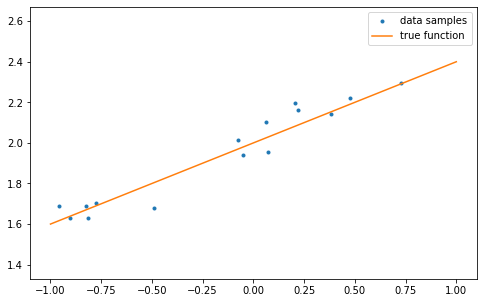

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.concatenate((np.random.normal(-1, 0.1, size=(5)),
                    np.random.normal(0, 0.5, size=(10))))
y= 0.4*x + 2 + np.random.normal(0, 0.05, size=(x.shape[0]))
x_plot = np.linspace(-1,1,100)
y_true = 0.4*x_plot  + 2


plt.figure(figsize=(8, 5))
plt.plot(x,y,'.', label='data samples')
plt.plot(x_plot,y_true, label='true function')
plt.axis('equal')
plt.legend()
plt.show()

## Recap: Maximum Likelihood
- We want parameter vector $\hat{w}$ that is as close as possible to the true, unknown $\mathbf{w}$.
- We have two sources of information
  - Our prior belief $\mathbf{w}$: $p(w)$
  - The observed data $\mathcal{D} = \{\left(x^{(0)},y^{(0)}\right),\ \dots,\ \left(x^{(m)},y^{(m)}\right) \}$
- We want to maximize the lokelihood of the model parametrized by $\mathbf{w}$ given the data $\mathcal{D}$
- This is $\hat{w} = \arg\max\limits_{w \in \mathbb{R}^n} p(\mathcal{D}\vert w)$
- If the data samples in $\mathcal{D}$ are independent, we can write
  - $\hat{w} = \arg\max\limits_{w \in \mathbb{R}^n}\prod\limits_{i=0}^m p\left(\left(x^{(i)},y^{(i)}\right)\middle\vert w\right)$
- It can be shown that finding $w$ that maximizes $\prod\limits_{i=0}^m p \left( y^{(i)}|x^{(i)}, w \right)$ (MLE), is equivalent to finding $w$ that minimizes $\frac{1}{2}\sum\limits_{i=0}^m \left(y^{(i)} -  w^Tx^{(i)} \right)^2$ (SSE)
  - For proof checkout Chap 7 of "Murphy, Kevin P. Machine learning: a probabilistic perspective. MIT press, 2012".

## Recap: Gradient Descent
- Idea: to find the minimum of a function (if differentiable)
  - calculate the gradient
  - follow it in the opposite direction to reach the bottom
- SSE function: $f(w) = \frac{1}{2}\sum\limits_{i=0}^m \left(y^{(i)} -  w^Tx^{(i)} \right)^2$
- Start with an arbitrary $w$
- While the change in $w$ is very small:
  - calculate the gradient $\nabla_wf(w)=\left(\frac{\partial}{\partial w_0}f(w),\dots,\frac{\partial}{\partial w_{n-1}}f(w)\right)$
  - $w \gets w - \alpha\nabla_wf(w)$

## Task 2
- Implement the Gradient Descent algorithm
- the partial detivatives are given as $\frac{\partial}{\partial w_j}f(w) = -\sum\limits_{i=0}^m x_j^{(i)}\left(y^{(i)} -  w^Tx^{(i)}\right)$
- Batch update rule:
  - $w_j \gets w_j + \alpha\left(\sum\limits_{i=0}^m x_j^{(i)}\left(y^{(i)} -  w^Tx^{(i)}\right)\right)$ (for every $j$)
- save the values of $w$ and SSE at each step then plot them

In [2]:
#gradient decent
w = np.array([0., 0.]) # initial conditions
alpha = 0.01 # learning rate

#generate feature vector
X = np.vstack([np.ones(x.shape[0]),x]).T

W = [w] # list to collact the weights
SSE = [] # list to collect sum of squared errors

# loop for n times, or until delta_w is very small
n_steps = 20
for k in range(n_steps):
    w = w + alpha*np.sum(X.T*(y-w.dot(X.T)), axis=1)
    W.append(w)
    SSE.append(np.sum((y-w.dot(X.T))**2))

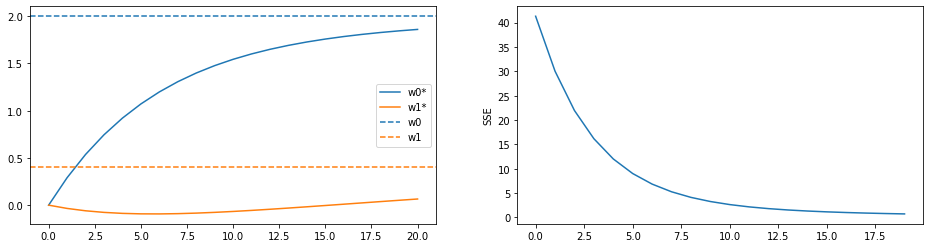

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(W, label=['w0*','w1*'])
axs[0].axhline(2.0,xmin=0, xmax=n_steps,c='C0',linestyle='--',label='w0')
axs[0].axhline(0.4,xmin=0, xmax=n_steps,c='C1',linestyle='--',label='w1')
axs[0].legend()

axs[1].plot(SSE)
axs[1].set_ylabel('SSE')
plt.show()

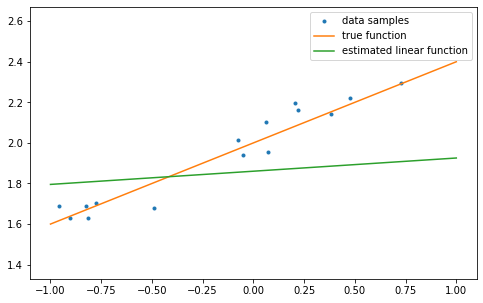

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(x,y,'.', label='data samples')
plt.plot(x_plot,y_true, label='true function')
plt.plot(x_plot,w.dot(np.vstack([np.ones(x_plot.shape[0]),x_plot])),
         label='estimated linear function')
plt.axis('equal')
plt.legend()
plt.show()

## Recap: Stochastic Gradient Descent
- Disadvantages of GD: the whole dataset needs to be observed before updating $w$
- Alternative: Stochastic gradient descent

- for $i=0,\dots,m$:
   - $w_j \gets w_j + \alpha\left(x_j^{(i)}\left(y^{(i)} -  w^Tx^{(i)}\right)\right)$ (for every $j$)

### Task 3
- implement SGD

In [5]:
# stochastic gradient decent
w_sgd = np.array([0., 0.])
alpha = 0.01

X = np.vstack([np.ones(x.shape[0]),x]).T
W = [w_sgd] # list to collact the weights
SSE = [] # list to collect sum of squared errors

n_steps=20
for k in range(n_steps):
    for i in range(X.shape[0]):
        w_sgd = w_sgd + alpha*(X[i,:]*(y[i]-w_sgd.dot(X[i,:])))
        W.append(w_sgd)
        SSE.append(np.sum((y-w_sgd.dot(X.T))**2))

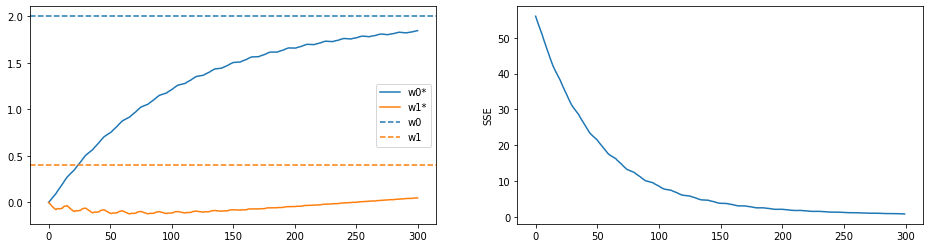

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(W, label=['w0*','w1*'])
axs[0].axhline(2.0,xmin=0, xmax=n_steps,c='C0',linestyle='--',label='w0')
axs[0].axhline(0.4,xmin=0, xmax=n_steps,c='C1',linestyle='--',label='w1')
axs[0].legend()

axs[1].plot(SSE)
axs[1].set_ylabel('SSE')
plt.show()

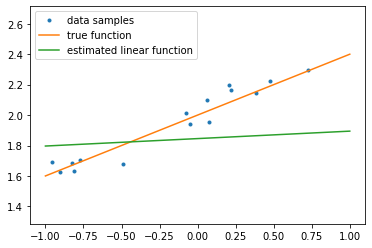

In [7]:
plt.figure()
plt.plot(x,y,'.', label='data samples')
plt.plot(x_plot,y_true, label='true function')
plt.plot(x_plot,w_sgd.dot(np.vstack([np.ones(x_plot.shape[0]),x_plot])), label='estimated linear function')
plt.axis('equal')
plt.legend()
plt.show()

## Remarks
- what do you notice about Gradient Descent methods?
- The learning rate and initial conditions matter
  - small learning rate: too slow
  - large learning rate: ping-pong effect or divergence

<img src='pics/gradient_descent.png' width="617" height="240">
source: https://www.jeremyjordan.me/nn-learning-rate/

## Remarks 2
- SSE is a quadratic convex, has only one minimum and has no constraints
- If the loss function has multiple minima, plateau or constaints
  - Vanilla gradient descent methods might fail

## Ordinary Least Squares (Moore-Pennrose Pseudo Inverse)
- Gradient descent can be slow
- For linear regression we can solve the minimum of SSE directly
- Since SSE is quadratic and positive.
  - simply solve for $\nabla_wSSE(\hat{w})=0$
- The result is directly $\hat{w} =  (X^TX)^{-1}X^Ty$

### Task 4:
- implement the Moore-Pennrose Pseudo-inverse (one line)

In [8]:
w_mp = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
print('w: ', w_mp)
print('sse: ', np.sum((y-w_mp.dot(X.T))**2))

w:  [2.01355583 0.41976313]
sse:  0.05496474752690619


### Non-linear Regression Using Linear Regression
- It is possible to learn nonlinear functions using a so-called projection dunction
  - Linear functions: $\phi(x) = (1, x)^T$
  - Polynomials: $\phi(x) = (x^0, x^1,\dots, x^k)^T$, k = degree of polynomial
  - Linear combination of a set of sinusoidal functions: $\phi(x) = (sin(0x/k), sin(1x/k), sin(2x/k),\dots, sin(x))^T$

- This can still be solved using simple linear regression
  - $\hat{w} =  (X_{\phi}^TX_{\phi})^{-1}X_{\phi}^Ty$

### Task 5.1
- Create a dataset using the real function $y = 0.5 x^3 - 0.1 x^2 + 0.5 + \epsilon$, 
   - where $\epsilon \sim \mathcal{N}(0, 0.5)$
- The independent variable $x$ should be sampled from a combined distribution:
   - 15 samples $\sim \mathcal{N}(-2, 0.2)$
   - 20 samples $\sim \mathcal{N}(0, 0.4)$
- Generate the true function $y$ using a linear space $x \in [-2.5,1.5]$

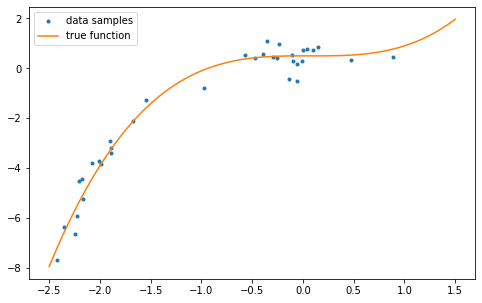

In [9]:
np.random.seed(2)
x = np.concatenate((np.random.normal(-2, 0.2, size=(15)),
                    np.random.normal(0, 0.4, size=(20)) ))
y= 0.5*x**3 - 0.1*x**2 + 0.5 + np.random.normal(0, 0.5, size=(x.shape[0]))
x_plot = np.linspace(-2.5,1.5,100)
y_true = 0.5*x_plot**3 - 0.1*x_plot**2  + 0.5

plt.figure(figsize=(8, 5))
plt.plot(x,y,'.', label='data samples')
plt.plot(x_plot,y_true, label='true function')
plt.legend()
plt.show()

## Task 5.2
- create a function that takes in a 1-d vector generates the feature function for a k-degree polynomial function
  - The function should return an array of the form: $[1, x, x^2, x^3, \cdots, x^k]$
- using the generated data, fit 4 polynomials of degrees 1, 2, 3 and 4.
- What do you notice?

In [10]:
def generate_feature_vector(x, degree=1):
    out = [np.ones(x.shape[0])]
    for i in range(degree):
        out.append(x**(i+1))
    return np.array(out).T

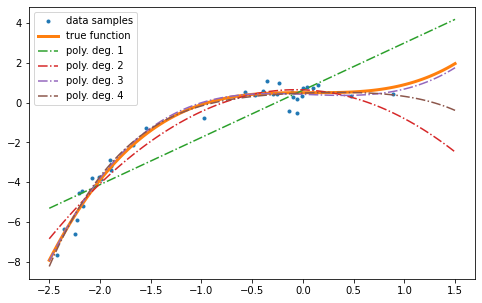

In [11]:
plt.figure(figsize=(8,5))
plt.plot(x,y,'.', label='data samples')
plt.plot(x_plot,y_true, lw=3, label='true function')
for i in range(1,5):
    # generate the feature vector [1,x,x^2,...,x^k]
    X = generate_feature_vector(x,i)
    # estimate the weights using Moore-Pennrose pseudo inverse method
    w_d = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    # plot the estimated function
    plt.plot(x_plot,w_d.dot(generate_feature_vector(x_plot,i).T),'-.',
             label='poly. deg. %d'%i)
plt.legend()
plt.show()

## Validation Curves (Train vs. Validation Error)
- A model is **underfitting** if it is too simple to describe the data (high training loss)
- A model is **overfitting** if it is too complex that it learns the noise (low training loss, high validation loss)
- A **good fitting** model can describe the data in an optimal manner (both train and val. loss are low and close to each other)

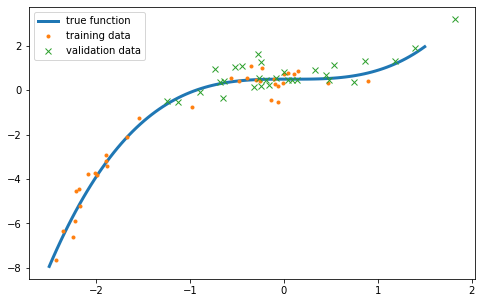

In [12]:
# create validation data
np.random.seed(5)
x_val = np.random.normal(0, 0.75, size=(30))
y_val = 0.5*x_val**3 - 0.1*x_val**2 + 0.5 + \
    np.random.normal(0, 0.5, size=(x_val.shape[0]))

plt.figure(figsize=(8,5))
plt.plot(x_plot,y_true, lw=3, label='true function')
plt.plot(x,y,'.',label='training data')
plt.plot(x_val,y_val,'x',label='validation data')
plt.legend()

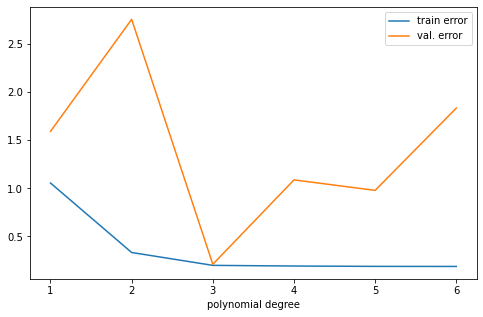

In [13]:
train_err = []
val_err = []
for i in range(1,7):
    X = generate_feature_vector(x,i)
    w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    train_err.append(np.sum((y-w.dot(X.T))**2)/35)
    val_err.append(np.sum((y_val-w.dot(generate_feature_vector(x_val,i).T))**2)/30)

plt.figure(figsize=(8,5))
plt.plot(range(1,7),train_err, label='train error')
plt.plot(range(1,7),val_err, label='val. error')
plt.xlabel('polynomial degree')
plt.legend()
plt.show()

## Regularization (Ridge Regression)
- Searching for an optimal model can be time consuming and expensive
- Regularization is an alternative that tries to *"tame"* a complex model
- It also introduces numerical stability
- The idea is to punish the weights if they become too big
  - $\hat{w} = \arg\min\limits_w \{\dfrac{1}{2}||y -Xw||^2_2 + ||\Gamma w||^2_2\}$
  - $Gamma$ could be a diagonal positive matrix
  - could be regulated to give preference of parts of the feature vector over the other
- Moore-Pennrose becomes:
  - $\hat{w} =  (X^TX + \Gamma^T\Gamma)^{-1}X^Ty$

In [14]:
np.random.seed(2)
x = np.concatenate((np.random.normal(-2, 0.2, size=(15)),
                    np.random.normal(0, 0.4, size=(20))))
y= 0.5*x**3 - 0.1*x**2 + 0.5 + np.random.normal(0, 2.0, size=(x.shape[0]))

pol_deg = 9 # set a hypothesis polynomial of order 9
X = generate_feature_vector(x,pol_deg)

# vanila LS
w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

# regularization matrix
G = np.diag(0.5*np.ones(pol_deg+1))
# LS with regularization
w_r = np.linalg.pinv(X.T.dot(X) + G.T.dot(G)).dot(X.T).dot(y)

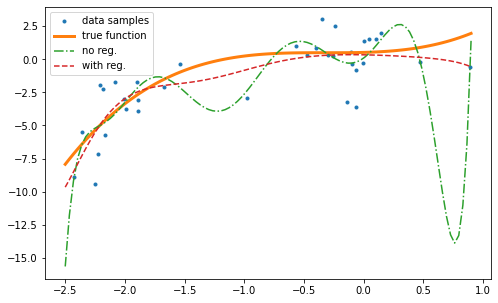

In [15]:
x_plot = np.linspace(-2.5,0.9,100)
plt.figure(figsize=(8,5))
plt.plot(x,y,'.', label='data samples')
plt.plot(x_plot,y_true, lw=3, label='true function')
plt.plot(x_plot,w.dot(generate_feature_vector(x_plot,pol_deg).T),'-.', label='no reg.')
plt.plot(x_plot,w_r.dot(generate_feature_vector(x_plot,pol_deg).T),'--', label='with reg.')
plt.legend()
plt.show()

## Advances Topics
### Bayesian Regression
- Include regularization parameters in the estimation procedure instead of tuning it as a hyperparameter
- To obtain a fully probabilistic model, the output is assumed to be Gaussian distributed around $Xw$
$$p(y|X,w,\Gamma) = \mathcal{N}(y|Xw,\Gamma)$$
- $\Gamma$ is a random variable that is to be estimated from the data
- More details in C. Bishop: Pattern Recognition and Machine learning

### Robust Regression
- Fitting a linear model in the presence of outliers and errors in the data
- E.g. RANdom SAmple Consensus (RANSAC), Huber regression, etc.